# Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset
- y = mx + c
- m => coefficient of regression 
- y => dependent various ==> "price" == "medv"
- x => independent varible  ==> all ther column features
## The objective is to predict the value of prices of the house using the given features.
- The medv variable is the target variable.
- medv : median value of owner-occupied homes in \$1000s
- lstat : lower status of the population (percent)
- rm : average number of rooms per dwelling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# importing the boston data using sklearn library
# from sklearn.datasets import load_boston
# boston = load_boston()
# print(boston)

# boston_dataset = pd.DataFrame(boston.data,columns=boston.feature_name)
# boston_dataset

#Transform the data set into a data frame 
#NOTE: boston.data = the data we want, 
#      boston.feature_names = the column names of the data
#      boston.target = Our target variable or the price of the houses
# df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
# df_y = pd.DataFrame(boston.target)

In [3]:
df = pd.read_csv("BostonHousing.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'BostonHousing.csv'

In [ ]:
df.isnull().sum()

In [2]:
df.dtypes

NameError: name 'df' is not defined

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Remember :
- Target Variable = "Price of House" = i.e. "medv" column = Dependent variable (y)
- Other columns = Independent variables (x)

<Axes: xlabel='medv', ylabel='Count'>

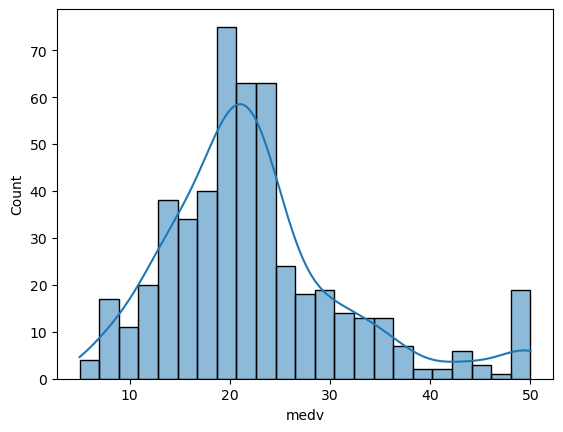

In [8]:
sns.histplot(x="medv",data=df,kde=True)

In [9]:
df.corr()  # correlation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## correlation matrix that measures the linear relationships between the variables.

<Axes: >

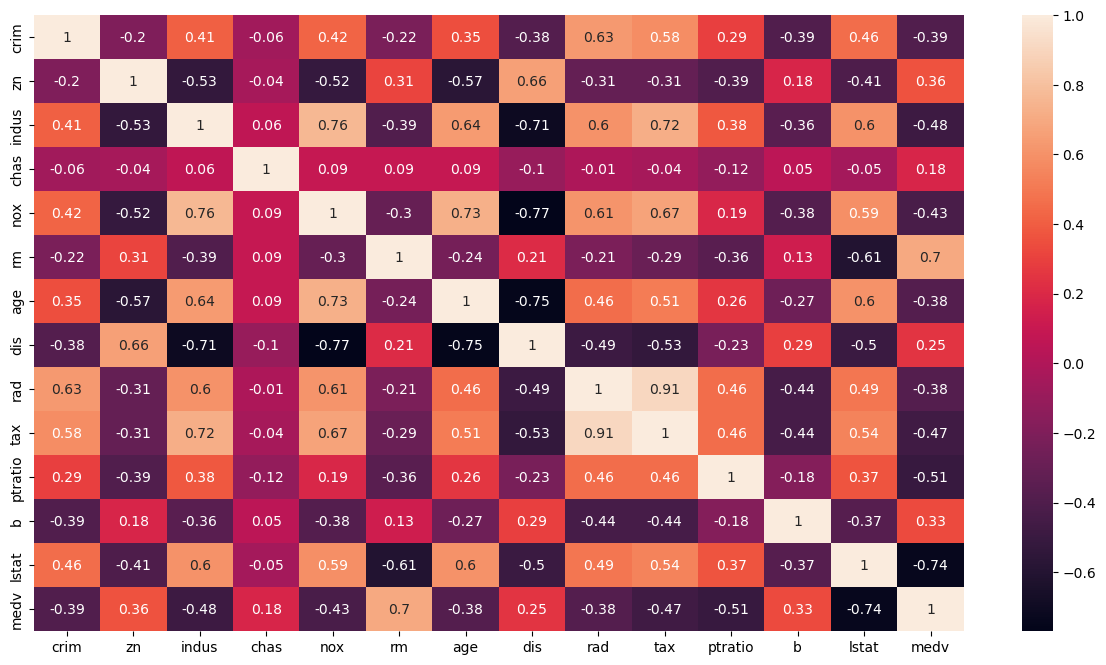

In [10]:
correlation_matrix = df.corr().round(2)
plt.subplots(figsize=(15,8))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix,annot=True)

### To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with DV(-0.74)

# Linear Regression

In [11]:
# from sklearn import linear_model
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

In [12]:
# Y = m X + c
# X => independent variable => "all other columns"
# Y => dependent variable => need to predict => "Price" => "medv"

# Here we seperate the first 13 columns in X and the last column to be predicted as Y.
df_X = df[ ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat"] ]
df_Y = df[["medv"]]

In [13]:
df_X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [14]:
df_Y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### Train the model with 80% of the samples and test with the remaining 20% to assess the model’s performance.

In [16]:
# Splitting the data into training and testing data using train_test_split
from sklearn.model_selection import train_test_split

# Dataset Split into Training(67%) and Testing(33%) dataset
x_test, x_train, y_test, y_train = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)

In [17]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(339, 13)
(339, 1)
(167, 13)
(167, 1)


## Training and testing the model
### Using scikit-learn’s LinearRegression to train model on both the training and test sets

In [18]:
# Training the model
# Importing and loading the Linear Regression model on the data.

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [19]:
# Testing the model
# Predicting price y_pred values for x_test data => then compare with actual y_test values

y_pred = lin_model.predict(x_test)
print(y_pred)

[[19.31336627]
 [16.31127081]
 [20.89633522]
 [11.56444727]
 [23.06372302]
 [23.1814242 ]
 [31.98843019]
 [21.71853912]
 [20.47905877]
 [24.92006346]
 [30.42385473]
 [31.74411753]
 [29.13796741]
 [ 8.73152034]
 [ 7.62042481]
 [13.58745484]
 [17.03525079]
 [32.35003835]
 [32.16729775]
 [17.92049123]
 [ 4.28240967]
 [29.51909205]
 [20.13117191]
 [18.31605277]
 [25.99095354]
 [18.59000003]
 [17.70397961]
 [12.43929657]
 [31.63546133]
 [23.09151008]
 [20.34076298]
 [19.55961218]
 [12.76951538]
 [28.63027798]
 [16.74167412]
 [30.87117266]
 [34.31582781]
 [25.37973897]
 [21.36292837]
 [25.12870469]
 [37.63557514]
 [29.15590017]
 [33.83011415]
 [23.146128  ]
 [26.30152776]
 [16.9227727 ]
 [28.00205774]
 [20.38372214]
 [31.50778967]
 [28.64809591]
 [19.48543004]
 [19.52800887]
 [13.14187377]
 [34.54289188]
 [38.28844719]
 [32.98529038]
 [ 7.12813864]
 [20.44157932]
 [23.19789079]
 [35.90766044]
 [15.32701578]
 [23.41070328]
 [20.66268797]
 [27.25960661]
 [16.09403965]
 [21.73732346]
 [25.98926

In [20]:
#comparison between the actual value of house price "medv" (y_test) and its value prediced by machine (y_pred)

actual_columns_tuple = tuple(y_test.medv)
actual_columns_tuple

result_df = pd.DataFrame(actual_columns_tuple, columns=["Actual"])
result_df["Predicted"] = y_pred
result_df["Difference"] = result_df["Predicted"] - result_df["Actual"]
result_df

,Actual,Predicted,Difference
0,14.6,19.313366,4.713366
1,16.6,16.311271,-0.288729
2,27.1,20.896335,-6.203665
3,20.1,11.564447,-8.535553
4,19.8,23.063723,3.263723
...,...,...,...
334,19.5,18.098769,-1.401231
335,21.1,23.049722,1.949722
336,24.5,27.795792,3.295792
337,13.4,14.619325,1.219325


## Model Evaluation & Accuracy

In [33]:
#After the model training and testing
#Print the coefecients/weights for each feature/column of our model
print(pd.DataFrame(lin_model.coef_))
#print(lin_model.coef_)

         0         1         2         3          4         5         6   \
0 -0.108271  0.057357 -0.075872  0.440729 -20.720279  3.549258  0.022866   

         7         8         9         10        11       12  
0 -1.603629  0.435992 -0.019952 -0.978874  0.004364 -0.45926  


In [22]:
print("Training model accuracy is:")
lin_model.score(x_train, y_train)

Training model accuracy is:


0.7648284962477703

In [23]:
print("Testing model accuracy is:")
lin_model.score(x_test, y_test)

Testing model accuracy is:


0.7053408322745373

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

print("Prediction model accuracy is:"+"\n")

#calculations of mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mead squared Error is:",rmse)
r2 = r2_score(y_test, y_pred)
print("R2 score is:",r2)

Prediction model accuracy is:

Mean Squared Error is: 25.972546230132192
Root Mead squared Error is: 5.0963267389495535
R2 score is: 0.7053408322745373
